In [1]:
import cv2
import torch
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path = '/Users/raunavghosh/Documents/Research for Vehant/Datasets/processed/CTP_Wires_Chargers_etc/P01X010-2022081700089_low.png'

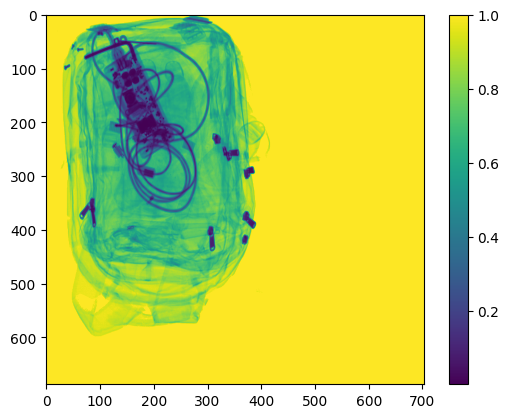

In [3]:
im = cv2.imread(path, cv2.IMREAD_ANYDEPTH)
plt.imshow(im/(2**16 - 1))
plt.colorbar()
plt.show()

In [4]:
h, w = im.shape
h, w

(688, 704)

In [5]:
crop_size = 84

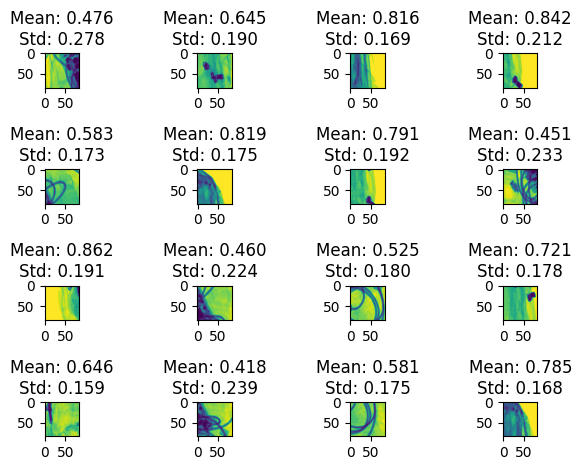

In [6]:
for i in range(16):
    plt.subplot(4, 4, i+1)
    std_dev = 0
    while std_dev <= 0.15:
        x = np.random.randint(0, w-crop_size)
        y = np.random.randint(0, h-crop_size)
        crop = im[y:y+crop_size, x:x+crop_size]/(2**16 - 1)
        std_dev = crop.std()
    plt.imshow(crop)
    plt.title(f'Mean: {crop.mean():.3f}\nStd: {crop.std():.3f}')

plt.tight_layout()
plt.show()

In [8]:
from model import Generator

In [36]:
PATH = './weights/generator_epoch590.pt'
gen = Generator()
gen.load_state_dict(torch.load(PATH, map_location=torch.device('cpu')))

RuntimeError: Error(s) in loading state_dict for Generator:
	Missing key(s) in state_dict: "encoder.conv1.0.weight", "encoder.conv1.0.bias", "encoder.conv1.1.weight", "encoder.conv1.1.bias", "encoder.conv1.1.running_mean", "encoder.conv1.1.running_var", "encoder.conv2.0.weight", "encoder.conv2.0.bias", "encoder.conv2.1.weight", "encoder.conv2.1.bias", "encoder.conv2.1.running_mean", "encoder.conv2.1.running_var", "encoder.conv3.0.weight", "encoder.conv3.0.bias", "encoder.conv3.1.weight", "encoder.conv3.1.bias", "encoder.conv3.1.running_mean", "encoder.conv3.1.running_var", "encoder.conv4.0.weight", "encoder.conv4.0.bias", "encoder.conv4.1.weight", "encoder.conv4.1.bias", "encoder.conv4.1.running_mean", "encoder.conv4.1.running_var", "encoder.conv5.0.weight", "encoder.conv5.0.bias", "encoder.conv5.1.weight", "encoder.conv5.1.bias", "encoder.conv5.1.running_mean", "encoder.conv5.1.running_var", "decoder.conv1.0.weight", "decoder.conv1.0.bias", "decoder.conv1.1.weight", "decoder.conv1.1.bias", "decoder.conv1.1.running_mean", "decoder.conv1.1.running_var", "decoder.conv2.0.weight", "decoder.conv2.0.bias", "decoder.conv2.1.weight", "decoder.conv2.1.bias", "decoder.conv2.1.running_mean", "decoder.conv2.1.running_var", "decoder.conv3.0.weight", "decoder.conv3.0.bias", "decoder.conv3.1.weight", "decoder.conv3.1.bias", "decoder.conv3.1.running_mean", "decoder.conv3.1.running_var", "decoder.conv4.0.weight", "decoder.conv4.0.bias", "decoder.conv4.1.weight", "decoder.conv4.1.bias", "decoder.conv4.1.running_mean", "decoder.conv4.1.running_var", "decoder.conv5.0.weight", "decoder.conv5.0.bias", "decoder.conv5.1.weight", "decoder.conv5.1.bias", "decoder.conv5.1.running_mean", "decoder.conv5.1.running_var". 
	Unexpected key(s) in state_dict: "module.encoder.conv1.0.weight", "module.encoder.conv1.0.bias", "module.encoder.conv1.1.weight", "module.encoder.conv1.1.bias", "module.encoder.conv1.1.running_mean", "module.encoder.conv1.1.running_var", "module.encoder.conv1.1.num_batches_tracked", "module.encoder.conv2.0.weight", "module.encoder.conv2.0.bias", "module.encoder.conv2.1.weight", "module.encoder.conv2.1.bias", "module.encoder.conv2.1.running_mean", "module.encoder.conv2.1.running_var", "module.encoder.conv2.1.num_batches_tracked", "module.encoder.conv3.0.weight", "module.encoder.conv3.0.bias", "module.encoder.conv3.1.weight", "module.encoder.conv3.1.bias", "module.encoder.conv3.1.running_mean", "module.encoder.conv3.1.running_var", "module.encoder.conv3.1.num_batches_tracked", "module.encoder.conv4.0.weight", "module.encoder.conv4.0.bias", "module.encoder.conv4.1.weight", "module.encoder.conv4.1.bias", "module.encoder.conv4.1.running_mean", "module.encoder.conv4.1.running_var", "module.encoder.conv4.1.num_batches_tracked", "module.encoder.conv5.0.weight", "module.encoder.conv5.0.bias", "module.encoder.conv5.1.weight", "module.encoder.conv5.1.bias", "module.encoder.conv5.1.running_mean", "module.encoder.conv5.1.running_var", "module.encoder.conv5.1.num_batches_tracked", "module.decoder.conv1.0.weight", "module.decoder.conv1.0.bias", "module.decoder.conv1.1.weight", "module.decoder.conv1.1.bias", "module.decoder.conv1.1.running_mean", "module.decoder.conv1.1.running_var", "module.decoder.conv1.1.num_batches_tracked", "module.decoder.conv2.0.weight", "module.decoder.conv2.0.bias", "module.decoder.conv2.1.weight", "module.decoder.conv2.1.bias", "module.decoder.conv2.1.running_mean", "module.decoder.conv2.1.running_var", "module.decoder.conv2.1.num_batches_tracked", "module.decoder.conv3.0.weight", "module.decoder.conv3.0.bias", "module.decoder.conv3.1.weight", "module.decoder.conv3.1.bias", "module.decoder.conv3.1.running_mean", "module.decoder.conv3.1.running_var", "module.decoder.conv3.1.num_batches_tracked", "module.decoder.conv4.0.weight", "module.decoder.conv4.0.bias", "module.decoder.conv4.1.weight", "module.decoder.conv4.1.bias", "module.decoder.conv4.1.running_mean", "module.decoder.conv4.1.running_var", "module.decoder.conv4.1.num_batches_tracked", "module.decoder.conv5.0.weight", "module.decoder.conv5.0.bias", "module.decoder.conv5.1.weight", "module.decoder.conv5.1.bias", "module.decoder.conv5.1.running_mean", "module.decoder.conv5.1.running_var", "module.decoder.conv5.1.num_batches_tracked". 

In [37]:
l_im = cv2.imread('/Users/raunavghosh/Documents/Research for Vehant/RAUNAV/processed_P01X010-2022120600157.dump_low.png', cv2.IMREAD_ANYDEPTH) / (2**16 - 1)
h_im = cv2.imread('/Users/raunavghosh/Documents/Research for Vehant/RAUNAV/processed_P01X010-2022120600157.dump_high.png', cv2.IMREAD_ANYDEPTH) / (2**16 - 1)

In [38]:
l_im.shape, h_im.shape

((402, 624), (402, 624))

In [39]:
l_im = l_im.reshape((1, 1, *l_im.shape))
h_im = h_im.reshape((1, 1, *h_im.shape))
l_im.shape, h_im.shape

((1, 1, 402, 624), (1, 1, 402, 624))

In [40]:
l_im = torch.Tensor(l_im)
h_im = torch.Tensor(h_im)

In [41]:
fused_im = gen(l_im, h_im)

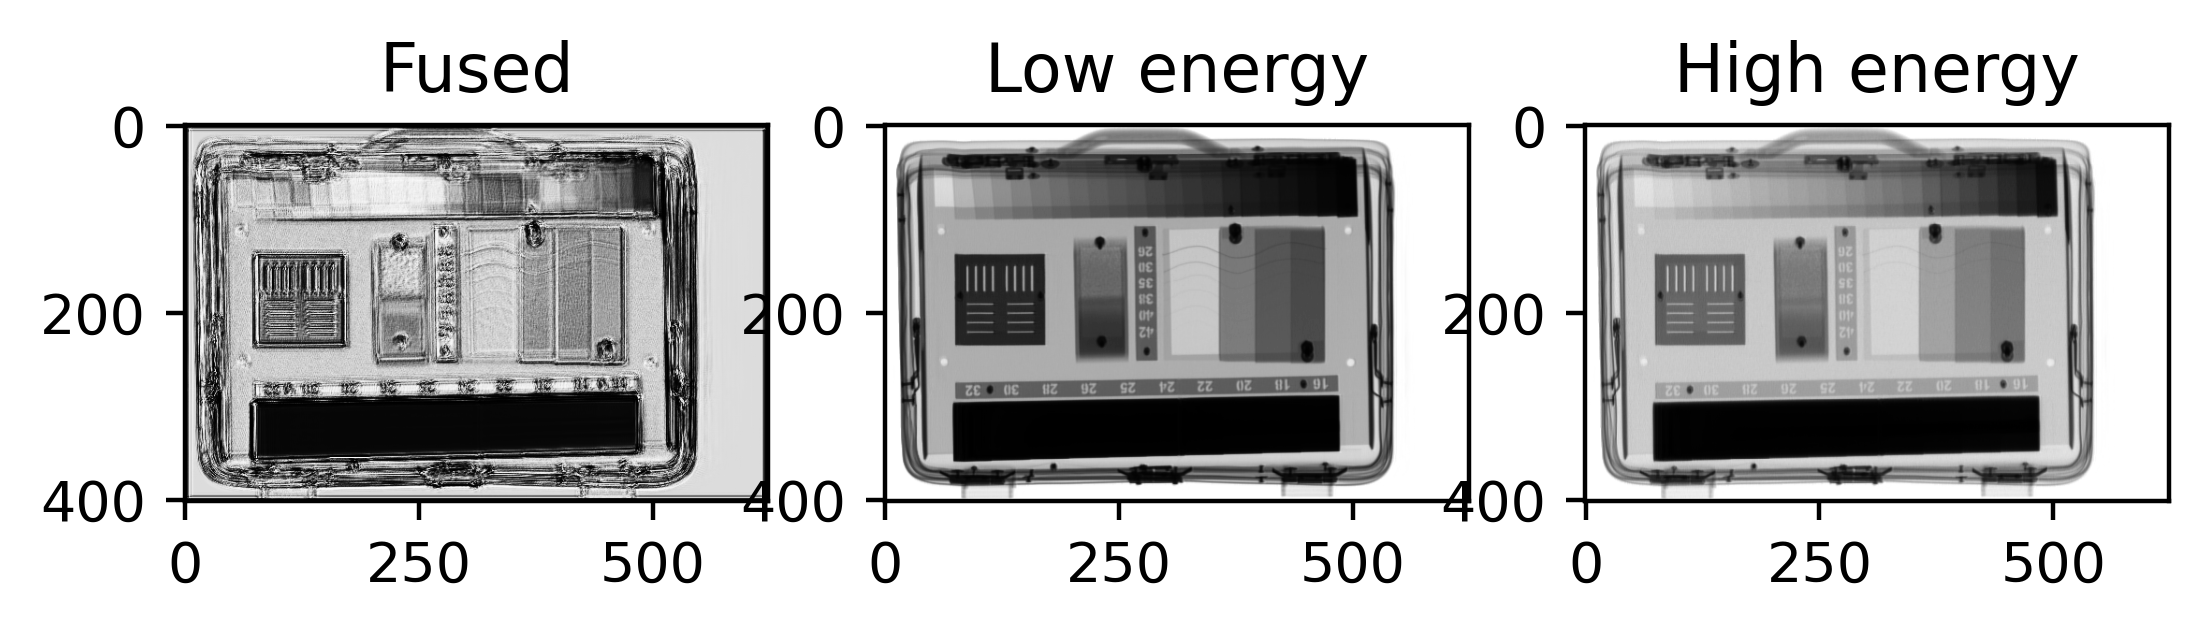

In [45]:
plt.figure(dpi=400)

plt.subplot(1, 3, 1)
plt.imshow(fused_im.detach().numpy()[0, 0], cmap='grey')
plt.title("Fused")

plt.subplot(1, 3, 2)
plt.imshow(l_im.detach().numpy()[0, 0], cmap='grey')
plt.title("Low energy")

plt.subplot(1, 3, 3)
plt.imshow(h_im.detach().numpy()[0, 0], cmap='grey')
plt.title("High energy")

plt.show()